In [8]:
import pandas as pd
import numpy as np
!pip install autoviz
!pip install wordcloud
from autoviz.AutoViz_Class import AutoViz_Class
# this will enable the visualization of the data 
import matplotlib.pyplot as plt
%matplotlib inline
#not sure I want the below items here.....
from sklearn import preprocessing
# these will allow for the KNN process later
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# dataset is 10 fields (157,651 rows) regarding the marketing scheme for a bank based off of customer's:
# X/independent/predictive variables:
#   PackageSizeName - string
#   MaterialId - string
#   Brand - string
#   ProdCategory - string
#   SoldToCorporateEntity  - string
#   SoldToBanner - string
#   SoldToRegional - string
#   SoldToPartner - string
#   Date - date
 

# Y/dependent/target variable:
# UnitsSold - decimal

df = pd.read_csv(r'C:\Users\tamle\Desktop\Utica\5 - MSDS Summer 2022\DSC-680 Capstone\datasets for python\BaseData.csv')
print(df)
df.head()

       PackageSizeName MaterialId Brand ProdCategory SoldToCorporate Entity  \
0                 P_15      M_127   B_3          C_2                  SC_34   
1                 P_15      M_127   B_3          C_2                  SC_34   
2                 P_15      M_127   B_3          C_2                  SC_34   
3                 P_15      M_127   B_3          C_2                  SC_34   
4                 P_15      M_127   B_3          C_2                  SC_34   
...                ...        ...   ...          ...                    ...   
157646            P_15      M_129   B_3          C_2                 SC_861   
157647            P_15      M_129   B_3          C_2                 SC_861   
157648            P_15      M_129   B_3          C_2                 SC_861   
157649            P_15      M_129   B_3          C_2                 SC_861   
157650            P_15      M_129   B_3          C_2                 SC_861   

       SoldToBanner SoldToRegional SoldToPartner   

,PackageSizeName,MaterialId,Brand,ProdCategory,SoldToCorporate Entity,SoldToBanner,SoldToRegional,SoldToPartner,Date,UnitsSold
0,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/5/2019,NaN
1,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/12/2019,NaN
2,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/19/2019,NaN
3,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/26/2019,NaN
4,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,2/2/2019,NaN


Shape of your Data Set loaded: (157651, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  3
    10 Predictors classified...
        This does not include the Target column(s)
        8 variables removed since they were ID or low-information variables
Since Number of Rows in data 157651 exceeds maximum, randomly sampling 157651 rows for EDA...


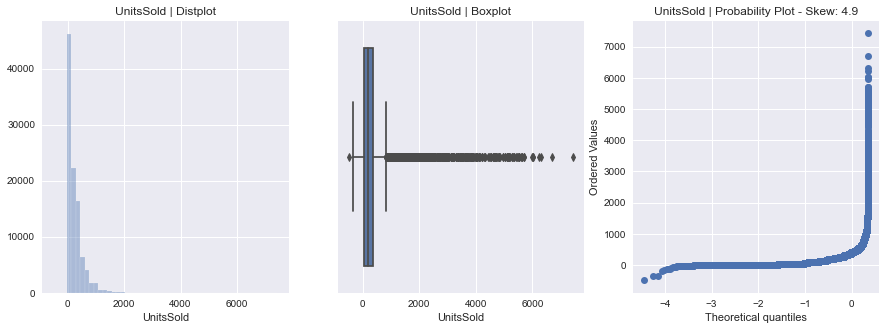

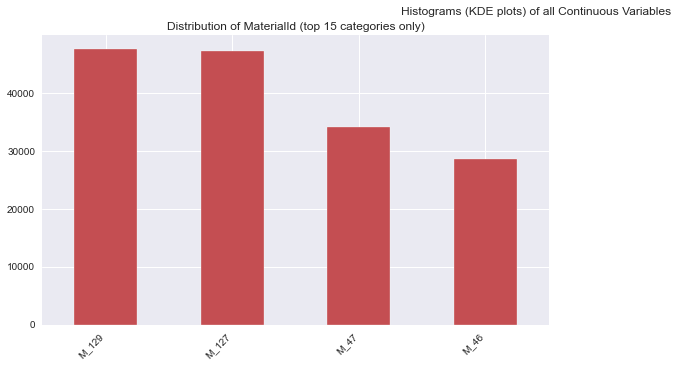

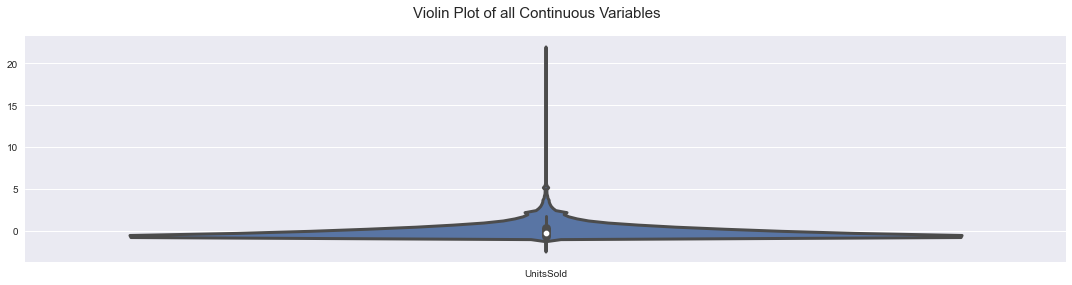

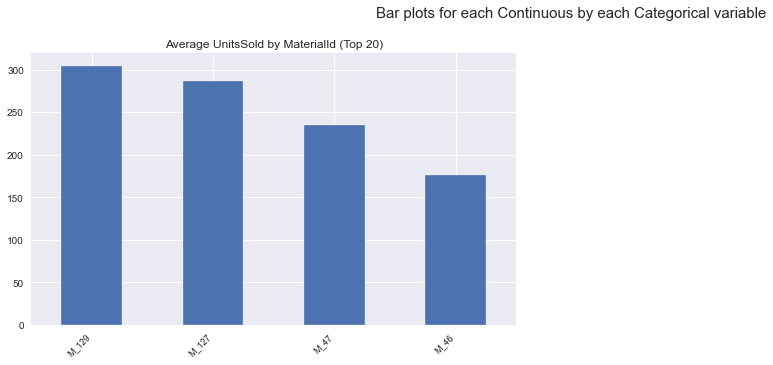

Time to run AutoViz (in seconds) = 2.189

 ###################### VISUALIZATION Completed ########################


In [37]:
df1 = AutoViz_Class()
filename = ""
sep = ","

graph = df1.AutoViz(
    filename, 
    sep = ",",
    depVar = "",
    dfte = df, 
    header = 0,
    verbose = 0,
    lowess = False,
    chart_format = "svg",
    max_rows_analyzed = 157651,
    max_cols_analyzed = 10,
    )

In [38]:
df.index = pd.to_datetime(df['Date'])
#df.drop(columns='Date',inplace=True)
df.head()

,PackageSizeName,MaterialId,Brand,ProdCategory,SoldToCorporate Entity,SoldToBanner,SoldToRegional,SoldToPartner,Date,UnitsSold
Date,,,,,,,,,,
2019-01-05,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/5/2019,NaN
2019-01-12,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/12/2019,NaN
2019-01-19,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/19/2019,NaN
2019-01-26,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,1/26/2019,NaN
2019-02-02,P_15,M_127,B_3,C_2,SC_34,SB_35,SR_45,SP_104,2/2/2019,NaN


In [39]:
df.isna().sum()

PackageSizeName               0
MaterialId                    0
Brand                         0
ProdCategory                  0
SoldToCorporate Entity        0
SoldToBanner                  0
SoldToRegional                0
SoldToPartner                 0
Date                          0
UnitsSold                 56990
dtype: int64

<AxesSubplot:xlabel='Date'>

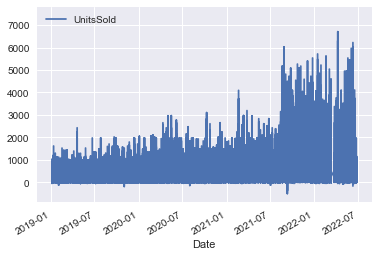

In [40]:
#plotting the UnitsSold vs Date
df.plot()

In [42]:
#Let's narrow the df down to just Date and UnitsSold to inspect those components only with the seasonal decomposition
df2 = df[['UnitsSold']]
df2.head()

,UnitsSold
Date,
2019-01-05,NaN
2019-01-12,NaN
2019-01-19,NaN
2019-01-26,NaN
2019-02-02,NaN


In [43]:
# let's see the various decompositions embedded in the data


from statsmodels.tsa.seasonal import seasonal_decompose
decompose_df2 = seasonal_decompose(df2, model="additive")
decompose_df2.plot();

###Note: Started running through the SARIMA model and did not clean out the
### NUll UnitsSold values, and it returned this result: "ValueError: This function does not handle missing values" 

### that tell's me that 1) I need another model for the base data besides SARIMA, 2) the other datasets will work in this model

ValueError: This function does not handle missing values